##Cursos MAI5024/SCC5848 - INTRODUÇÃO A CIENCIA DE DADOS
##Profa. Roseli Ap. Francelin Romero
##**Exercício 02 - Entrega 13 de abril de 2023** 
## Transformação nos dados e Seleção de variáveis
### Alunos:

- David Melo da Luz
- Nilson Perez



---

Nesse exercício utilizaremos um dataset para classificação binária. No total são 19 variáveis de entrada e 1 variável de saída. O dataset pode ser encontrado no arquivo "dataset_hepatitis.csv".

Existem valores faltantes nesse dataset, representados pelo caractere "?".

**Há material complementar disponível para resolução desse exercício. Acesse o arquivo "Transformações em dados heterogeneos" antes de prosseguir.**

### Questão 01.

Carregue o dataset (`pandas.read_csv`) e interprete os valores ausentes corretamente. Utilize o parâmetro `na_values`.

In [50]:
#importa o pandas
import pandas as pd
import numpy as np

#Selelciona todos valores utilizando o na_values
na_values_list = ["?"]
df = pd.read_csv(r'E:\usp\dataset_hepatitis.csv', na_values=na_values_list)

#Lista faltantes por coluna
print(df.isnull().sum())
#Calcula percentual de nulos por coluna
print((df.isnull().sum() / len(df)) * 100)

AGE                 0
SEX                 0
STEROID             1
ANTIVIRALS          0
FATIGUE             1
MALAISE             1
ANOREXIA            1
LIVER_BIG          10
LIVER_FIRM         11
SPLEEN_PALPABLE     5
SPIDERS             5
ASCITES             5
VARICES             5
BILIRUBIN           6
ALK_PHOSPHATE      29
SGOT                4
ALBUMIN            16
PROTIME            67
HISTOLOGY           0
Class               0
dtype: int64
AGE                 0.000000
SEX                 0.000000
STEROID             0.645161
ANTIVIRALS          0.000000
FATIGUE             0.645161
MALAISE             0.645161
ANOREXIA            0.645161
LIVER_BIG           6.451613
LIVER_FIRM          7.096774
SPLEEN_PALPABLE     3.225806
SPIDERS             3.225806
ASCITES             3.225806
VARICES             3.225806
BILIRUBIN           3.870968
ALK_PHOSPHATE      18.709677
SGOT                2.580645
ALBUMIN            10.322581
PROTIME            43.225806
HISTOLOGY           0.000

Nossa intepretação dos dados:

- AGE e SEX: Não há valores nulos nessas colunas.
- STEROID, FATIGUE, MALAISE, e ANOREXIA: Cada uma dessas colunas possui 1 valor nulo, representando 0,645161% dos dados em cada coluna.
- LIVER_BIG: Há 10 valores nulos nesta coluna, representando 6,451613% dos dados.
- LIVER_FIRM: Há 11 valores nulos nesta coluna, representando 7,096774% dos dados.
- SPLEEN_PALPABLE, SPIDERS, ASCITES e VARICES: Cada uma dessas colunas possui 5 valores nulos, representando 3,225806% dos dados em cada coluna.
- BILIRUBIN: Há 6 valores nulos nesta coluna, representando 3,870968% dos dados.
- ALK_PHOSPHATE: Há 29 valores nulos nesta coluna, representando 18,709677% dos dados.
- SGOT: Há 4 valores nulos nesta coluna, representando 2,580645% dos dados.
- ALBUMIN: Há 16 valores nulos nesta coluna, representando 10,322581% dos dados.
- PROTIME: Há 67 valores nulos nesta coluna, representando 43,225806% dos dados.
- HISTOLOGY e Class: Não há valores nulos nessas colunas.

A coluna PROTIME foi a que mais apresentou valores nulos, enquanto AGE e SEX não apresentaram valores nulos.



---

### Questão 02.

Nessa questão, você irá fazer o pré-processamento dos dados.

Você deve:


*   **Para os dados numéricos:** substitua os valores faltantes utilizando a estratégia de média (`sklearn.impute.SimpleImputer`). Depois padronize o intervalo dessas variáveis (`sklearn.preprocessing.StandardScaler`)
*   **Para os dados categóricos:** substitua os valores faltantes utilizando a estratégia de mais frequentes (`sklearn.impute.SimpleImputer`). Depois converta os dados categóricos para uma representação numérica (`sklearn.preprocessing.OneHotEncoder`),

Lembre-se de utilizar as classes `sklearn.pipeline.Pipeline` e `sklearn.compose.ColumnTransformer` conforme consta no material complementar. 

In [54]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Identificar colunas numéricas
num_columns = df.select_dtypes(include=[np.number]).columns.tolist()
print("Colunas numéricas:", num_columns)

# Identificar colunas categóricas
cat_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Colunas categóricas:", cat_columns)

# Converter todos os '?' em NaN
df = df.replace("?", np.nan)

# Substituir valores faltantes em dados numéricos usando a estratégia de média (sklearn.impute.SimpleImputer):
num_imputer = SimpleImputer(strategy='mean')

# Padronizar o intervalo das variáveis numéricas (sklearn.preprocessing.StandardScaler):
scaler = StandardScaler()

# Criar um pipeline para processar variáveis numéricas:
num_pipeline = Pipeline([
    ('imputer', num_imputer),
    ('scaler', scaler)
])

# Substituir valores faltantes em dados categóricos usando a estratégia de mais frequentes (sklearn.impute.SimpleImputer):
cat_imputer = SimpleImputer(strategy='most_frequent')

# Converter dados categóricos para uma representação numérica (sklearn.preprocessing.OneHotEncoder):
one_hot_encoder = OneHotEncoder()

# Criar um pipeline para processar variáveis categóricas:
cat_pipeline = Pipeline([
    ('imputer', cat_imputer),
    ('encoder', one_hot_encoder)
])

# Criar um ColumnTransformer para aplicar o processamento nas colunas apropriadas:
num_columns = ['AGE', 'BILIRUBIN', 'ALK_PHOSPHATE', 'SGOT', 'ALBUMIN', 'PROTIME']
cat_columns = ['SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE', 'ANOREXIA', 'LIVER_BIG', 'LIVER_FIRM', 'SPLEEN_PALPABLE', 'SPIDERS', 'ASCITES', 'VARICES', 'HISTOLOGY']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_columns),
        ('cat', cat_pipeline, cat_columns)
    ])

# Extrair a coluna 'Class' antes de aplicar o ColumnTransformer
y = df['Class'].values

# Aplicar o ColumnTransformer ao dataframe:
df_processed = preprocessor.fit_transform(df)

# Obter os nomes das colunas categóricas transformadas
cat_columns_transformed = preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(cat_columns)

# Concatenar os nomes das colunas numéricas e categóricas transformadas
all_columns_transformed = num_columns + cat_columns_transformed.tolist()

# Converter o array NumPy em um DataFrame do Pandas
df_processed = pd.DataFrame(df_processed, columns=all_columns_transformed)

# Adicionar a coluna 'Class' de volta ao DataFrame processado
df_processed['Class'] = y


Colunas numéricas: ['AGE', 'BILIRUBIN', 'ALK_PHOSPHATE', 'SGOT', 'ALBUMIN', 'PROTIME', 'Class']
Colunas categóricas: ['SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE', 'ANOREXIA', 'LIVER_BIG', 'LIVER_FIRM', 'SPLEEN_PALPABLE', 'SPIDERS', 'ASCITES', 'VARICES', 'HISTOLOGY']




---

### Questão 03.

Determine as 10 variáveis mais relevantes do conjunto (lembre-se de concatenar a variável alvo no dataset transformado, iato é, após transformar os dados). Você pode utilizar a matriz de covariância (`numpy.cov`), correlação (`pandas.DataFrame.corr`), `scatterplot`, etc. Justifique sua escolha.

Lembre-se que heatmaps (`seaborn.heatmap`) podem auxiliar a visualização.

As 10 variáveis mais relevantes são: ['ASCITES_yes', 'ASCITES_no', 'ALBUMIN', 'BILIRUBIN', 'SPIDERS_no', 'SPIDERS_yes', 'VARICES_no', 'VARICES_yes', 'MALAISE_no', 'MALAISE_yes']


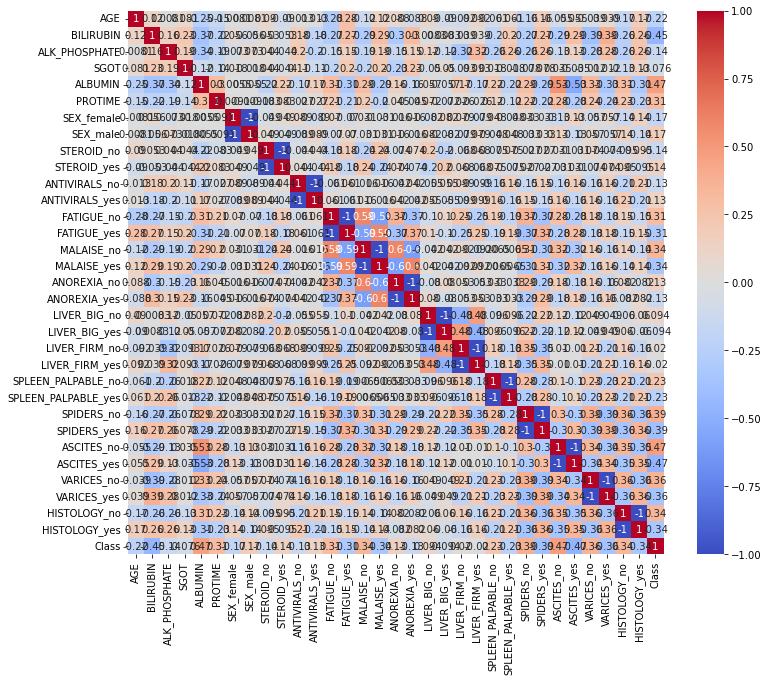

In [55]:
# Concatenar os nomes das colunas numéricas e categóricas transformadas
all_columns_transformed = num_columns + cat_columns_transformed.tolist()

# Converter o array NumPy em um DataFrame do Pandas
df_processed = pd.DataFrame(df_processed, columns=all_columns_transformed)

df_processed['Class'] = df['Class'].values

correlation_matrix = df_processed.corr()

# Obter correlações absolutas com a variável alvo
correlations_with_target = correlation_matrix['Class'].apply(abs)

# Ordenar as correlações em ordem decrescente
sorted_correlations = correlations_with_target.sort_values(ascending=False)

# Selecionar as 10 variáveis mais relevantes (excluindo a própria variável alvo)
top_10_features = sorted_correlations[1:11].index
print("As 10 variáveis mais relevantes são:", top_10_features.tolist())

import seaborn as sns
import matplotlib.pyplot as plt

# Configurar o tamanho da figura
plt.figure(figsize=(12, 10))

# Criar o heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Configurar os rótulos do eixo x e y
plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.show()



---

### Questão 04.

Com as 10 varíaveis determinadas na questão anterior, crie um novo conjunto de dados.

Lembre-se que o numpy permite indexar colunas/linhas utilizando arrays.

In [57]:
df_processed_np = df_processed.values
selected_columns_indices = [df_processed.columns.get_loc(col) for col in top_10_features]
selected_features_np = df_processed_np[:, selected_columns_indices]



---

### Questão 05.

Reduza a dimensionalidade do conjunto de dados criado utilizando a técnica PCA (`sklearn.decomposition.PCA`). Reduza a dimensionalidade de forma que no mínimo 80% da variância dos dados seja mantida (atente-se ao atributo  `explained_variance_ratio_`). Depois exiba os eixos principais.

In [61]:
from sklearn.decomposition import PCA

# Criar uma instância do PCA sem especificar o número de componentes
pca = PCA()

# Ajustar o PCA aos dados
pca.fit(selected_features_np)

# Determine o número mínimo de componentes principais para preservar pelo menos 80% da variância dos dados
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
num_components = np.where(cumulative_explained_variance >= 0.8)[0][0] + 1

# Criar uma nova instância do PCA com o número de componentes determinado
pca_reduced = PCA(n_components=num_components)

# Ajustar o PCA aos dados novamente e transformar os dados
selected_features_pca = pca_reduced.fit_transform(selected_features_np)

# Exibir os eixos principais
print("Eixos principais:\n", pca_reduced.components_)

Eixos principais:
 [[ 0.15337625 -0.15337625 -0.63546836  0.6122822  -0.1820611   0.1820611
  -0.12894469  0.12894469 -0.19325627  0.19325627]
 [-0.10772375  0.10772375  0.65499298  0.73846966  0.02456043 -0.02456043
  -0.02479956  0.02479956  0.00086033 -0.00086033]
 [-0.04977272  0.04977272 -0.33164534  0.25332507  0.42326882 -0.42326882
   0.04407878 -0.04407878  0.47889679 -0.47889679]]




---

### Questão 06.

Teste um modelo de classificação (através da função `model_tester`) nos conjuntos criados nas questões 4 e 5. Houve redução expressiva da acurácia? Comente o resultado obtido.

In [62]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

# - Descrição:  Função que testa um modelo de classificação (MLP). 
# - Parâmetros: Variáveis de entrada (inputs) e a variável alvo (target).
# - Retorna:    Não retorna nenhum valor. Mas imprime a acurácia do modelo.
def model_tester(inputs, target):
    clf = MLPClassifier(hidden_layer_sizes=(5,), random_state=0, max_iter=10000)
    scores = cross_val_score(clf, inputs, target, cv=10)
    print("Score do classificador: %.2f" % (scores.mean()*100))

# Seleção das variáveis de entrada e saída
features = ['ASCITES_yes', 'ASCITES_no', 'ALBUMIN', 'BILIRUBIN', 'SPIDERS_no', 'SPIDERS_yes', 'VARICES_no', 'VARICES_yes', 'MALAISE_no', 'MALAISE_yes']
X = df_processed[features].values
y = df_processed['Class'].values

# Criação dos conjuntos de dados reduzidos com PCA
pca = PCA(n_components=0.8) # seleciona o número de componentes necessários para reter 80% da variância
X_pca = pca.fit_transform(X)

# Teste do modelo nos conjuntos de dados original e reduzido com PCA
print("Acurácia no conjunto de dados original:")
model_tester(X, y)

print("Acurácia no conjunto de dados reduzido com PCA:")
model_tester(X_pca, y)

Acurácia no conjunto de dados original:
Score do classificador: 82.54
Acurácia no conjunto de dados reduzido com PCA:
Score do classificador: 83.92
